# Big project

## Submission

Submit solutions to https://forms.office.com/e/WexY7YraJb.

1.   Upload code in .ipynb file
2.   Upload a csv containing three columns: 
*    "ID": the ID of the instance (1, 2, 3, ...)
*    "OBJ": the objective function value obtained
*    "TIME": the execution time in seconds.

## Evaluation

1.   Gap w.r.t. optimal solutions
2.   Runtimes. Must be under 10 minutes for every instance. Execution times will be re-examined on a random basis.

## Deadline

12/01/2022 23:59 CET

## Other

*   4 lab points just if you deliver something that works
*   10 points based on the quality of method
*   NO pre-coded libraries, 
*   NO genetic algorithms 
*   NO neural networks
*   groups of max 3 students




## Biogas plants location

An association of $n$ farmers wants to open $p$ plants to produce energy from biogas. 
Each plant will be opened at a farm of a member of the association and will be powered with corn chopping purchased from the farm itself or from other neighboring farms.

Each farm $i$ can provide at most $c_i$ tons of corn chopping, with a percentage of dry matter $a_i$. As you may know, dry matter is the key component of corn chopping used for biogas production. In order to maintain the quality of produced energy, each plant must burn a mixture of corn chopping with a percentage of dry matter between $k_{min}$ and $k_{max}$. 

At most one plant can be located in each farm, and every farm can sell its corn chopping to one and only one plant.

Each farm $i$ is located at coordinates $x_i$ and $y_i$, representing respectively its latitude and longitude, and the cost of moving corn chopping from a farm $i$ to a farm $j$ is proportional to the euclidean distance between the two farms (it does not depend on the actual quantity moved, since the trucks used for this transportations are sufficiently big). 

Under such conditions, every plant produces $Q$ kWh of energy per ton of corn chopping burned. The energy produced by each plant will be fed into the national electricity system, at a unitary price of $b$ (€/kWh). Moreover, due to state regulations, each plant must not produce more than $M$ kWh of energy.

You must locate $p$ plants among the available farms and assign the farms that will supply each plant, with the goal of maximizing the total revenues of the association.

### Sets
*   $I$ = set of farms

### Parameters
*   $n$ = number of farms   
*   $p$ = number of plants to locate
*   $b$ = revenue per unit of energy (€/kWh)
*   $M$ = max energy production (kWh)
*   $Q$ = energy produced by a ton of corn chopping (kWh/t)
*   $k_{min} (k_{max})$ = min (max) percentage of dry matter for fermentation
*   $a_i$ = percentage of dry matter in chopping from farm $i \in I$
*   $c_i$ = tons of corn chopping available for each $i \in I$ (t)
*   $x_i, y_i$ = coordinates of farm $i \in I$

In [8]:
# Branch and cut algorithm. Compute objective value first. Apply cutting plane algorithm since it's the fastest
# (less reliable). If there is an integer solution we're cool. Otherwise, apply the Branch and Cut algorithm 
# (create two sub-models). See if we have an integer solution --> Apply the cutting plane algorithm again. 
# All of this under the condiction that if we find a value under the incubent one, we stop.

In [20]:
# Clean files if present
!rm instance_1.json
!rm instance_1.txt

# Download instance_1 (both instance and solution) directly from Github
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_3.json
!wget https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_3.txt

rm: instance_1.json: No such file or directory
rm: instance_1.txt: No such file or directory
--2023-01-07 16:04:59--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/instances/instance_1.json
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 572 [text/plain]
Saving to: 'instance_1.json'

instance_1.json     100%[===================>]     572  --.-KB/s    in 0s      

2023-01-07 16:04:59 (14.7 MB/s) - 'instance_1.json' saved [572/572]

--2023-01-07 16:04:59--  https://raw.githubusercontent.com/Daddeee/FOR_Labs_22-23/master/big-project/results/instance_1.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.108.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubuserco

In [1]:
# When using Colab, make sure you run this instruction beforehand
!pip install --upgrade cffi==1.15.0 | grep -v 'already satisfied'
import importlib
import cffi
importlib.reload(cffi)
!pip install mip | grep -v 'already satisfied'

In [94]:
#the optimal LP solution we found happens to be optimal for the ILP as well because it is integer and because the LP is a relaxation of the ILP problem.

In [95]:
# unsupported format string passed to NoneType.__format__

In [160]:
import json
import numpy as np
import mip

def recalculate_clusters(X, centroids, k):
    """ Recalculates the clusters """
    # Initiate empty clusters
    clusters = {}
    # Set the range for value of k (number of centroids)
    for i in range(k):
        clusters[i] = []
    # Setting the plot points using dataframe (X) and the vector norm (magnitude/length)
    for data in X:
        # Set up list of euclidian distance and iterate through
        euc_dist = []
        for j in range(k):
            euc_dist.append(np.linalg.norm(data - centroids[j]))
        # Append the cluster of data to the dictionary
        clusters[euc_dist.index(min(euc_dist))].append(data)
    return clusters    
 
def recalculate_centroids(centroids, clusters, k):
    """ Recalculates the centroid position based on the plot """ 
    for i in range(k):
        # Finds the average of the cluster at given index
        centroids[i] = np.average(clusters[i], axis=0)
    return centroids

def k_means_clustering(X, centroids={}, k=3, repeats=20):
    """ Calculates full k_means_clustering algorithm """
    for i in range(k):
        # Sets up the centroids based on the data
        centroids[i] = X[i]

    # Outputs the recalculated clusters and centroids 
    print(f'First and last of {repeats} iterations')
    for i in range(repeats):        
        clusters = recalculate_clusters(X, centroids, k)  
        centroids = recalculate_centroids(centroids, clusters, k)
        
    return clusters

def spanning_tree(k,points): #Inspired by laboratory 2.
    
    # ------------------ MODEL RESOLVING. SPANNING TREE.
    
    grid_size = 100 # size of the grid of points

    # Define the set of vertices of the graph as the list of numbers from 0 to k-1

    V = [i for i in range(k)]

    # Determine the distance between each point
    distance = np.linalg.norm(np.array(points) - np.array(points)[:,None], axis=-1)

    # Set of edges: note the condition that i<j (so we have pairs i,j but not j,i)
    # and especially the condition that prevents long arcs.

    # Ususally, in the litterature, we find a capital E related to the undirected edges.

    E = [(i,j) for i in V for j in V if i < j]
    
    # la partie de résolution du modèle. 
    
    # Generate the powerset of V
    # Contains all the subset of V
    from itertools import chain, combinations
    powerset = list(chain.from_iterable(combinations(V, r) for r in V))

    # combinations(V,1) = (0,), (1,),... (k-1), and so on...
    # f.i. powerset = [(0,), (1,)..., (0,1), ..., (0,1,2)] Until we consider all the subsets of V
    
    s = mip.Model()

    x = {(i,j): s.add_var(var_type=mip.BINARY) for (i,j) in E}

    for S in powerset:
        # We can only include subsets that are note empty.
        # Also, we don't want to include the set of all nodes.
        if len(S) > 0 and len(S) < k:
            s.add_constr(mip.xsum(x[i,j] for (i,j) in E 
                                if (i in S and j not in S)
                                or (j in S and i not in S)) >= 1)

    s.objective = mip.minimize(mip.xsum(distance[i,j]*x[i,j] for (i,j) in E))
    s.optimize()
    
    # ---- THE BEST NODE FROM THE PARTITION (THE ONE CLOSEST TO EVERY OTHER NODE OF THE PARTITION)
    
    sol = [(i,j) for (i,j) in E if x[i,j].x > 0.0001]
    print(f"{len(sol)} selected. {sol}")
   
    # If there is only one point in this cluster.
    if len(sol) == 0:
        i,j = points[0]
        to_add_constr = [i,j]
        return to_add_constr
    else:
        # From here we select the one who has the most arcs ingoing/outgoing.
        dic = {}
        for i in sol:
            for j in i:
                if j in dic.keys():
                    dic[j] = dic[j] + 1
                else:
                    dic[j] = 1
        max_value = max(dic.values()) # Select among all the farms, the ones with the highest number of arcs.
        print(dic)
        highest_farm = [k for k,v in dic.items() if v == max_value] # Put the farms with the highest value inside a list.
        # Choose the best node according their distance towards the other nodes of the same partition.
        coeff_list = [0]*k
        if len(highest_farm) > 1:
            for i in V:
                coeff_list[i] = sum(distance[i,:])
            i,j = points[coeff_list.index(min(coeff_list))]
            to_add_constr = [i,j]
        else:
            i,j = points[highest_farm[0]]
            to_add_constr = [i,j]
    
    return to_add_constr

def branch_and_bound(m,i,j,x,y,ub,x_list): # Problème avec cet algorithme ici. 
    
    # Start to resolve the first sub_model.
    delta = m.num_rows
    for p in M:
        if p != j:
            m.add_constr(x[i,p] == 0)
    m.optimize()
    if type(m.objective_value) == float:
        #cutting_plane(m,x,y)
        if m.objective_value > ub:
            # We continue the branch & bound algo.
            # The variables are all integer ?
            status = int_or_not(m)
            if status == None:
                ub = m.objective_value # upper_bound takes a new value.
                x_list = x_var(m) # Save the values of our integer variables.
            else: # We have fractional variables in our sub-model.
                i,j = status
                # Apply the Branch and cut algorithm. # Recursivity.
                ub,x_list = branch_and_bound(m,i,j,x,y,ub,x_list)
    delta = m.num_rows - delta # Compute the number of extra rows we added.
    m.remove([m.constrs[-k] for k in range(1,delta+1)]) 
    
    # Start to resolve the second sub_model
    delta = m.num_rows
    m.add_constr(x[i,j] == 0)
    m.optimize()
    if type(m.objective_value) == float:
        #cutting_plane(m,x,y)
        if m.objective_value > ub:
            status = int_or_not(m) # Insérer les variables du modèle q.
            if status == None:
                ub = m.objective_value # upper_bound takes the new value.
                x_list = x_var(m)
            else:
                i,j = status
                ub,x_list = branch_and_bound(m,i,j,x,y,ub,x_list)
    delta = m.num_rows - delta # Compute the number of extra rows we added.
    m.remove([m.constrs[-k] for k in range(1,delta+1)]) 
    return ub,x_list

Clp0006I 0  Obj 2318672.7 Primal inf 1.2518751 (1) Dual inf 4.5815982e+10 (8)
Clp0014I Perturbing problem by 0.001% of 1.1208639 - largest nonzero change 2.9274448e-05 ( 0.0028041242%) - largest zero change 2.982246e-05
Clp0000I Optimal - objective value 2208359.7
Starting solution of the Linear programming problem using Primal Simplex

Profit: 385611.92 euro
Powerplants:
  0 -->   1.000; farms: 0 (1.00); 2 (1.00); 4 (1.00); 6 (1.00); 9 (1.00); 
  1 -->   1.000; farms: 1 (1.00); 
  7 -->   1.000; farms: 3 (1.00); 5 (1.00); 7 (1.00); 8 (1.00); 


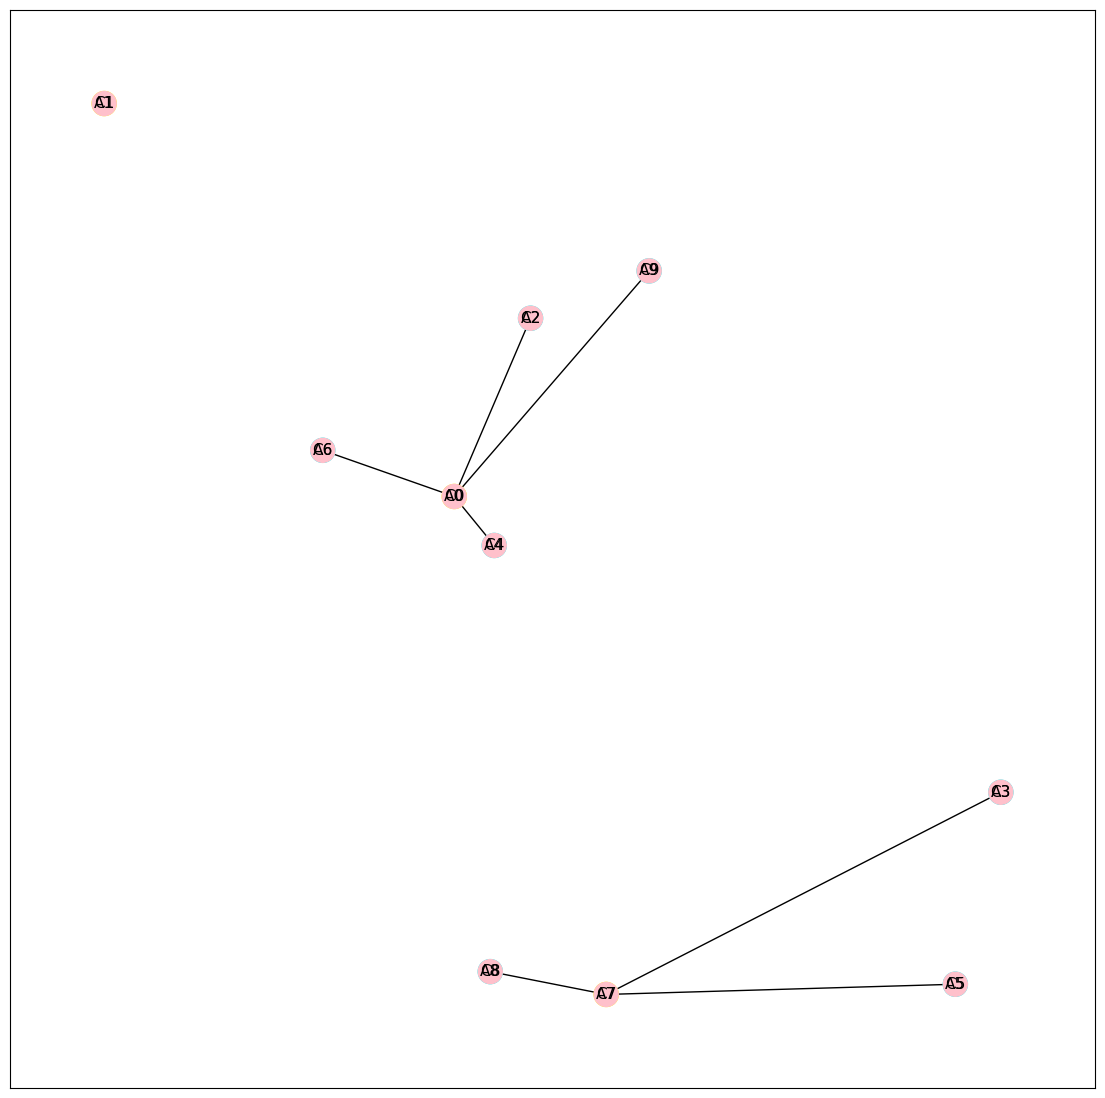

CPU times: user 113 ms, sys: 10.7 ms, total: 124 ms
Wall time: 153 ms
result: 385611.9177921265
expected: 385611.91779212654
gap: -1.5094881207703145e-14


In [12]:
# ------------------------- FUNCTIONS.

# Reads a .json instance and returns it in a dictionary
def load_instance(filename):
    with open(filename, 'r') as f:
        data = json.load(f)
    return data

# Reads a .txt result and returns it
def load_result(filename):
    with open(filename, 'r') as f:
        result = f.read()
    return float(result)

#def kmeans_clustering():

def x_var(m):
    # Returns an array of the variables x_ij of the model m.
    x_list = np.zeros((inst['n'],inst['n']))
    k = inst['n']
    for i in I:
        for j in M:
            x_list[i,j] = m.vars[k].x
            k = k+1
    return x_list

def int_or_not(m):
    # check if the number is an int. Otherwise, returns a the index of the variable that is not an int.
    # However, for a specific farm related to ONE powerplant, its x_ij value could potentially
    # not reach 1 because of the written model and the constraint related to the k_min & k_max.
    # In fact x_ij represent also the percentage of which the crop of farm i is used.
    status = None
    x_list = x_var(m)         
    for i in I:
        for j in M:
            if not ((x_list[i,j] + eps) > 1 or (x_list[i,j] - eps) < 0):
                # case where the value of x_ij is a fractional value.
                k = 0 # Put a counter.
                for l in M:
                    if x_list[i,l] != 0:
                        k = k + 1
                if k > 1:
                    status = (i,j)
                    print(status)
                    break # Leave the inner loop.
        if status != None:
            break # Leave the outer loop if a fractional value is found.
    if status == None:
        return status
    else:
        i,j = status
        return i,j   

def print_result(m,x,y):

    import networkx as nx
    import matplotlib.pyplot as plt
    
    print(f"Profit: {m.objective_value:.2f} euro") # print the objective value of the model.

    print("Powerplants:") # For every powerplant opening we print the index of the candidate site j and the value of variable i.
    for j in M:
        if y[j].x > 1e-7:
            print(f"{j:3d} --> {y[j].x:7.3f}; farms: ", end='') # We print the index of the candidate site j and it's value y.
            for i in I: # For each powerplant.
                if x[i,j].x > 1e-7:
                    print(f"{i} ({x[i,j].x:.2f}); ", end='') # We then print the assign farms with the value of x[i,j].
            print('')
    # Visualize solution on graph
    pos_a = {f'A{j}': (pp_crd[j][0], pp_crd[j][1]) for j in M}
    pos_c = {f'C{i}': (f_crd[i][0], f_crd[i][1]) for i in I}
    
    nodepos = {**pos_a, **pos_c}
    
    # We visualize the solution on a graph. We will see light_blue powerplant (non-open powerplant). Yellow if they are open and are connected to assigned farms.
    
    g = nx.Graph()
    g.add_nodes_from([f'A{j}' for j in M])
    g.add_nodes_from([f'C{i}' for i in I])
    edges = [(f'A{j}', f'C{i}') for j in M for i in I if x[i,j].x > 0] 
    g.add_edges_from(edges)
    color = ['yellow' if y[j].x > 1e-6 else 'cyan' for j in M] + ['pink']*inst['n']
    plt.figure(1, figsize=(14,14))
    nx.draw_networkx(g, font_size=11, pos=nodepos, node_color=color)
    plt.show()

def solve(instance):
    # Compute the Euclidean distance between two points (fast version).
    # D_matrix = fast_distance_matrix(np.array(instance['points'])) # The euclidean distance matrix.
    D_matrix = np.linalg.norm(np.array(instance['points']) - np.array(instance['points'])[:,None], axis=-1)
    
    # -----
    
    # Under 10 farms. The branch & Bound technique is sufficient and fast enough to compute the solution.
    if instance['n'] > 10:
        clusters = k_means_clustering(np.array(instance['points']), k = instance['p'])
        # Rearrange the clusters for the spanning tree.
        a = {}
        for i in clusters:
            b = np.zeros((len(clusters[i]),2))
            for j in range(len(clusters[i])):
                b[j] = clusters[i][j]
            a[i] = b
        clusters = a
        
        # Spanning tree for each cluster we have. return the best node susceptible to have a powerplant
        # for each cluster.
        constraints = []
        for i in range(len(clusters)):
            to_add_constraints = spanning_tree(len(clusters[i]),clusters[i])
            print(to_add_constraints)
            i = instance['points'].index(to_add_constraints) # To retrieve which farm is it.
            constraints.append(i) # The farms with very high probability to have a powerplant are put in this list.
        print(constraints)
    else:
        constraints = []
    # -----
    
    # LP relaxation. Dual-bound. It is much faster to solve LP relax. rather than the IP.
    
    m = mip.Model()
    
    # ---- Add the VARIABLES.
    # As we did in laboratory 4, instead of storing them in a list, we store them in a dictionary with key (i,j).
    # Helpful for the display.
    y = {j: m.add_var(lb=0, ub=1) for j in M}
    x = {(i,j): m.add_var(lb=0, ub=1) for i in I for j in M}
    
    # ---- Add the CONSTRAINTS.
    # We need to deploy a certain amount of fixed powerplants.
    m.add_constr(mip.xsum(y[j] for j in M) == instance['p'])
    
    # Each farm can be related to at most 1 powerplant. It means it can only furnish crops to only 1 powerplant.
    # Some farms may have 0 powerplant to related to them.
    for i in I:
        m.add_constr(mip.xsum(x[i, j] for j in M) <= 1)
    
    # Production limit on the energy per powerplant.
    for j in M:
        m.add_constr(mip.xsum(instance['Q']*instance['c'][i]*x[i, j] for i in I) <= instance['M'])
    
    # To respect the rightful dosage of crops to fuel a powerplant. Double constraints to linearize it.
    for j in M:
        m.add_constr(mip.xsum(instance['c'][i]*x[i, j]*(instance['a'][i] - instance['kmax']) for i in I) <= 0)
        m.add_constr(mip.xsum(instance['c'][i]*x[i, j]*(instance['a'][i] - instance['kmin']) for i in I) >= 0)
        
    # Last constraint is a consequence of the chosen binary variables.
    # Explanation is in labratory 4 but eventually if the binary variable 'y' is equal to 0 ==> leftside = 0.
    # We do not have any connexions with farms and an unexisting powerplant at location j.
    # On the other side, there is at most n farms connected to powerplant j. (Reminder: Multiple farms can be 
    # connected to a powerplant but a farm can only be connected to one and only one powerplant)
    for j in M:
        m.add_constr(mip.xsum(x[i, j] for i in I) <= instance['n']*y[j])
    
    # From the cutting_plane method laboratory 4. Explain why.
    for i in I:
        for j in M:
            m.add_constr(x[i,j] <= y[j])
    
    # Add the constraint found in the clusters.
    for i in constraints:
        if (instance['a'][i] > instance['kmax']) or (instance['a'][i] < instance['kmin']):
            for p in M:
                if p != i:
                    m.add_constr(x[i,p] == 0)
        else:
            m.add_constr(x[i,i] == 1)
    
    # ---- Add the OBJECTIVE FUNCTION.
    
    # We want to maximize the Profits = Revenue - Costs. We have to parts for that.
    # Try to shorten the version of the objective function later. 
    
    m.objective = mip.maximize(
        mip.xsum(instance['Q']*instance['b']*instance['c'][i]*x[i, j] for i in I for j in M) -
        mip.xsum(D_matrix[i, j]*x[i, j] for i in I for j in M)
    )
    
    m.optimize()
    
    # Apporter une contrainte supplémentaire. La ferme qui abrite une centrale fournit directement à cette centrale.
    
    # ---- Branch and Cut algorithm. Can choose between two options. The branch & bound or the cutting-plane.
    
    #cutting_plane(m,x,y) # Apply the cuttin algorithm. we gangsta'. 
    
    # Check if there are any fractional values in the optimal variable solution or if a farm has at least more
    # than 2 connections with powerplants. Our optimal solution could be composed of a x_ij that is still fractional
    # as long it is connected to only one powerplant it is alright !

    status = int_or_not(m)
    if status != None:
        i,j = status
        # Apply the Branch and cut algorithm.
        ub = 0 # Our upper_bound.
        x_list = x_var(m)
        ub,x_list = branch_and_bound(m,i,j,x,y,ub,x_list)
        #print(ub) # For Debugging.
        #print(x_list)
        for i in I:
            for j in M:
                m.add_constr(x[i,j] == x_list[i,j])
    
    #for i in range(m.num_rows): # Debugg.
        #print(m.constrs[i])    
    
    m.optimize()
    print_result(m,x,y)
    
    return m.objective_value

# ------------------------- INITIALIZATION.

inst = load_instance("instance_2.json")
res = load_result("instance_2.txt")

# We suppose that we can have at most n powerplants such as p <= n.
I = range(inst['n']) # Set of n farms.
M = I # Set of number of farm candidates that can host a power plant.
    
#The potential future powerplants candidates and the locations of the farms.
pp_crd = inst['points']
f_crd = pp_crd

eps = 1e-3

# ------------------------- TREATMENT.

%time obj = solve(inst)

gap = 100 * (obj - res) / res

print("result: {}".format(obj))
print("expected: {}".format(res))
print("gap: {}".format(gap))

# Let's print our model just right under this code. 

# On va coupler une méthode heuristique à l'aide de notre branch & bound. 

In [ ]:
for i in I:
    for j in M:
        if (inst['a'][i] < inst['kmax']) and (inst['a'][i] > inst['kmin']):
            coeff_list[i,j] = 1 - D_matrix[i,j]/(inst['Q']*inst['b']*inst['c'][i])
        else:
            coeff_list[i,j] = 0


# Visualiser la matrice des coeffs. 

In [152]:
dic = {0: 4, 2: 4, 1: 3, 5: 2}
max_value = max(dic.values())
print(max_value)
highest_farm = [k for k,v in dic.items() if v == max_value]
print(highest_farm)

4
[0, 2]
